In [ ]:
#import libraries and xl file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/PandaKnee/Rod-Pump-Failure-Analysis/refs/heads/main/rodpump_dataset.csv')


In [ ]:
#count datatypes, print dimensions
print(df.dtypes.value_counts())
print(df.shape)
#print(df.columns)

float64    28
object     18
int64       7
bool        1
Name: count, dtype: int64
(5192, 54)


In [ ]:
#check duplicates
df = df[['roduid','UWI','NODEID','IDWELL','tbguid','lifetime_start','lifetime_end','lifetime_duration_days','IDRECJOBPULL','REPORTTO/FAILURETYPE','H2S_CONCENTRATION','PrimarySetpoint','SecondarySetpoint','StrokeLength','GrossStrokeLength','Fillage','YesterdaysAverageSPM','bha_configuration','chemgroup1_any','chemgroup1_all','chemgroup2_any','chemgroup2_all','chemgroup3_any','chemgroup3_all','max_unguided_dls','dls_high_in_hole','gas_anchor_length','MAX_INCLINATION','wellbore_category','manual_scale','packer_vs_tac','AVG_PRESS_FLOWLINE','AVG_PRESSURE_TUBING','AVG_PRESSURE_CASING','AVG_DIFFERENTIAL_PRESSURE','AVG_OIL_VOLUME','AVG_WATER_VOLUME','AVG_LIQUID_VOLUME','AVG_WATERSG','rod_sinker_type','rod_has_guides','rod_make','rod_apigrade','ROUTE','overall_max_sideload','shallow_max_sideload','max_unguided_sideload','DESANDDEGAS_TYP','CHROME_LENGTH','ENDURALLOY_LENGTH','POLY_LENGTH','NIPPLE_SET_DEPTH','pump_bore','gasanchor_od']].drop_duplicates()
#drop duplicates due to rounding error
df = df.drop_duplicates(subset=['roduid','UWI','NODEID','IDWELL','tbguid'])
print(df.shape) #this is exactly 1/2 of given dataset

(2596, 54)


In [ ]:
#one-hot encoding
df[['FAILED']] = df[['REPORTTO/FAILURETYPE']].notnull().astype('int64')


#impute missing values of Failure Type variable with "NOFAIL"
df[['REPORTTO/FAILURETYPE']] = df[['REPORTTO/FAILURETYPE']].fillna(value="NOFAIL")

df[['REPORTTO/FAILURETYPE','FAILED']].head(8)

,REPORTTO/FAILURETYPE,FAILED
0,Tubing,1
1,Tubing,1
2,Sucker Rod Pump,1
3,Sucker Rod Pump,1
4,NOFAIL,0
5,NOFAIL,0
6,Tubing,1
7,Tubing,1


In [12]:
#convert incorrect data types
df[['chemgroup1_any', 'chemgroup1_all', 'chemgroup2_any',
    'chemgroup2_all', 'chemgroup3_any', 'chemgroup3_all']] = df[['chemgroup1_any', 'chemgroup1_all', 'chemgroup2_any',
    'chemgroup2_all', 'chemgroup3_any','chemgroup3_all']].astype('bool')

df[['ROUTE']] = df[['ROUTE']].astype('object')

#separate df into data types
df_num = df.select_dtypes(include=('int64','float64','datetime64[ns]'))
df_categorical = df.select_dtypes(include='object')

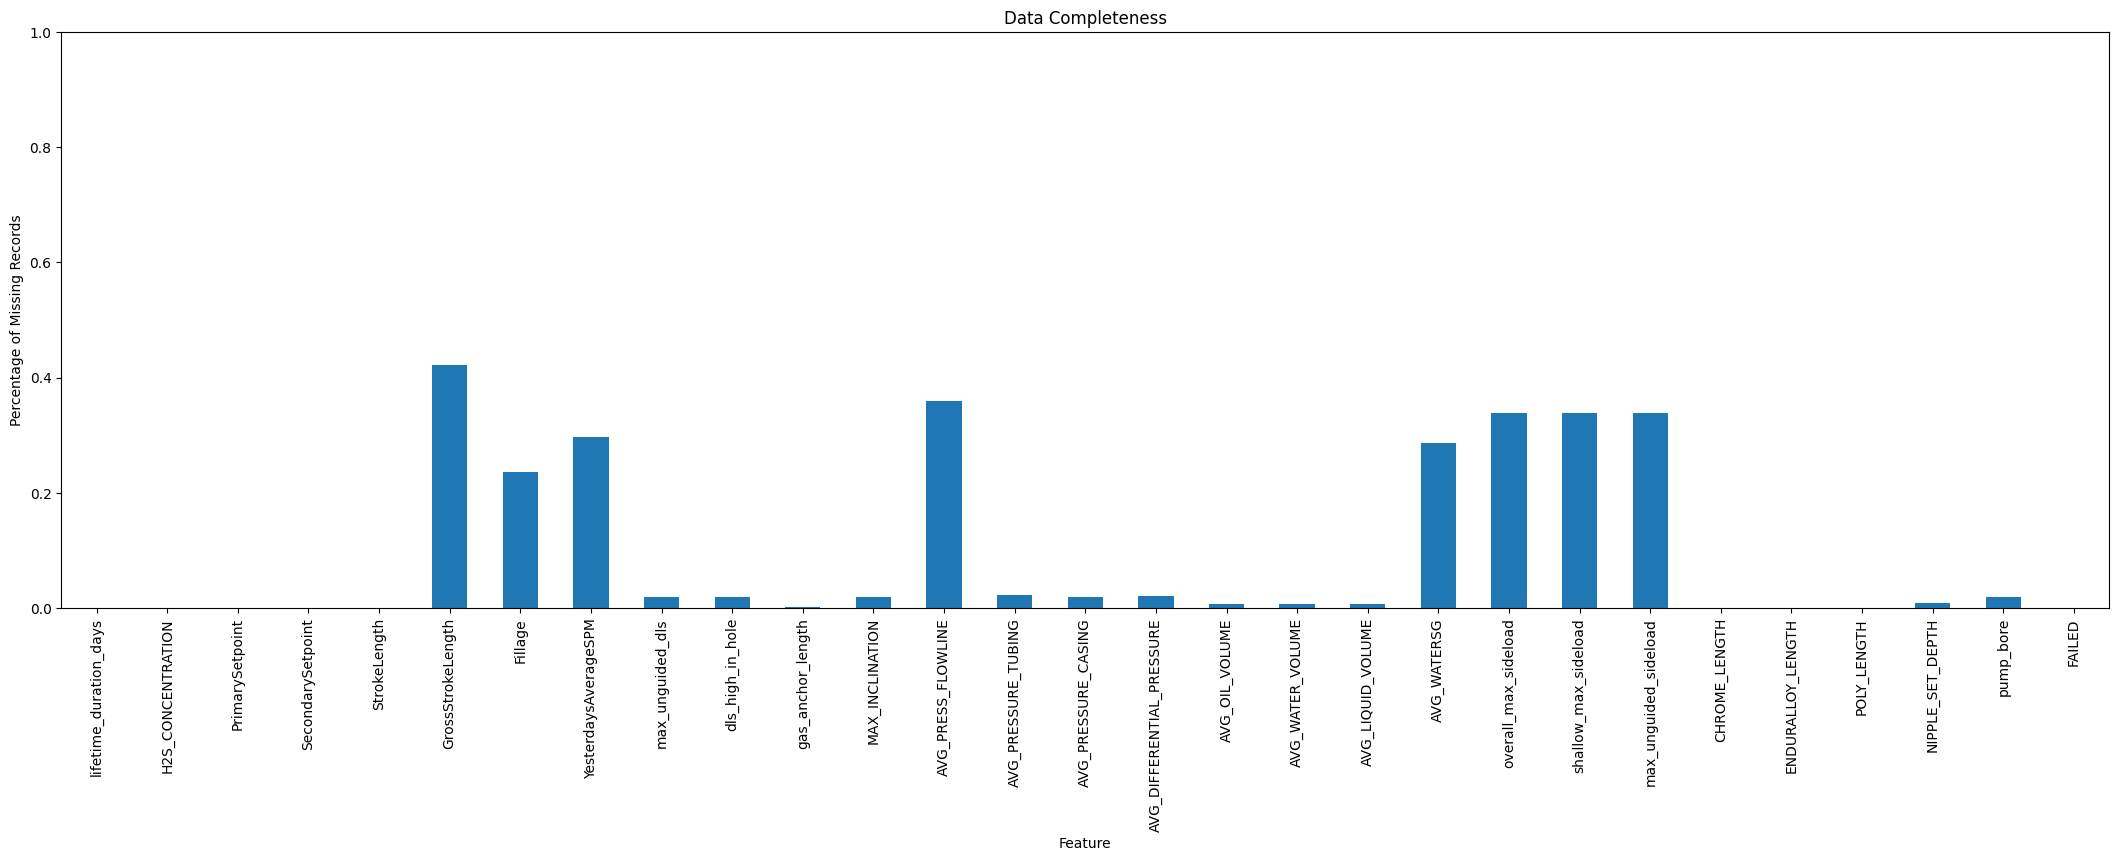

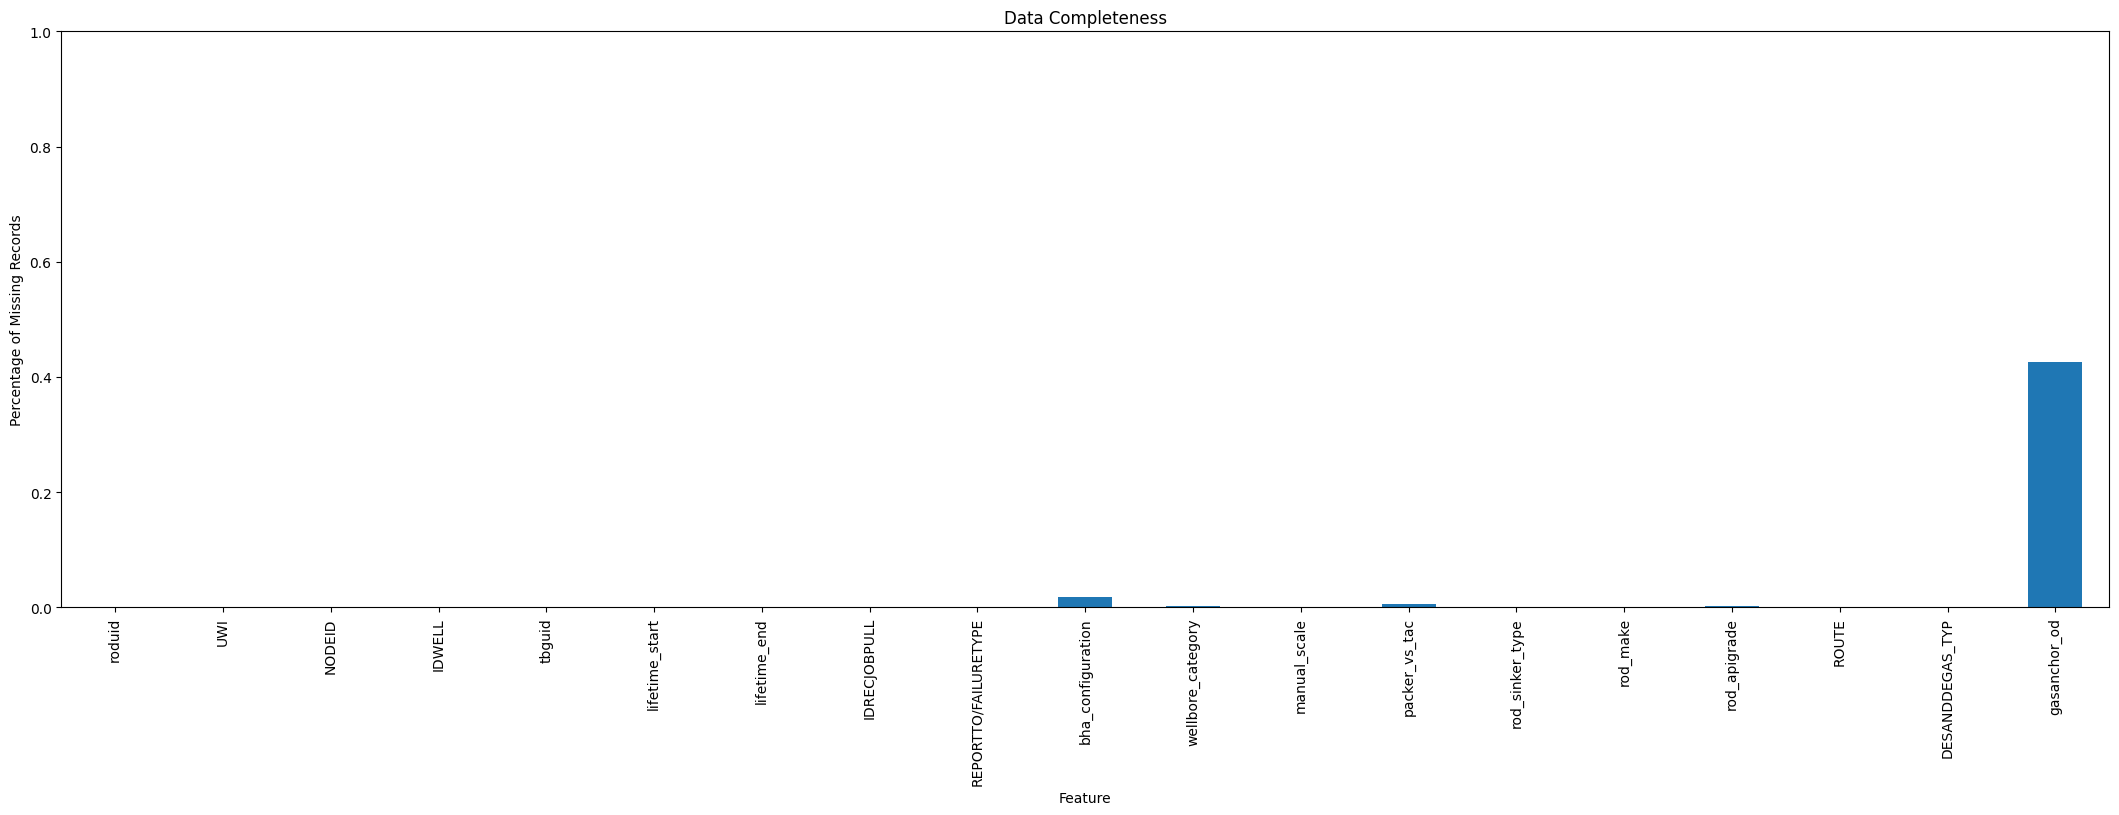

In [ ]:
#View Nulls, code taken from Prof Michael Pyrcz's Subsurface Data Analytics Demo

#numerical
(df_num.isnull().sum()/len(df_num)).plot(kind = 'bar')
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.2, hspace=0.2) # plot formatting
plt.xlabel('Feature'); plt.ylabel('Percentage of Missing Records'); plt.title('Data Completeness')
plt.ylim([0,1.0])
plt.show()

#categorical
(df_categorical.isnull().sum()/len(df_categorical)).plot(kind = 'bar')
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.2, hspace=0.2) # plot formatting
plt.xlabel('Feature'); plt.ylabel('Percentage of Missing Records'); plt.title('Data Completeness')
plt.ylim([0,1.0])
plt.show()
#note: a good chunk of gasanchor_od is explicity stated as unknown. Actual NA prop is well over 50

In [ ]:
## viewing missing data by record
# (df_num.isnull().sum(axis=1)/len(df_num.columns)).plot(kind = 'bar')
# plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.2, hspace=0.2) # plot formatting
# plt.xlabel('Sample Index'); plt.ylabel('Percentage of Missing Records'); plt.title('Data Completeness')
# plt.xticks(np.arange(0,len(df_num),10),np.arange(0,len(df_num),10))
# plt.ylim([0,1.0])
# plt.show()

,lifetime_duration_days,H2S_CONCENTRATION,PrimarySetpoint,SecondarySetpoint,StrokeLength,GrossStrokeLength,Fillage,YesterdaysAverageSPM,max_unguided_dls,dls_high_in_hole,...,AVG_WATERSG,overall_max_sideload,shallow_max_sideload,max_unguided_sideload,CHROME_LENGTH,ENDURALLOY_LENGTH,POLY_LENGTH,NIPPLE_SET_DEPTH,pump_bore,FAILED
lifetime_duration_days,1.0000,0.0005,0.0027,0.1118,0.0124,0.0103,0.0162,0.0096,0.0002,0.0000,...,0.0552,0.0071,0.0056,0.0037,0.0005,0.0114,0.0056,0.0058,0.0341,0.0087
H2S_CONCENTRATION,0.0005,1.0000,0.0000,0.0001,0.0000,0.0000,0.0003,0.0022,0.0000,0.0000,...,0.0003,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.0004,0.0002,0.0010
PrimarySetpoint,0.0027,0.0000,1.0000,0.0369,0.0073,0.0003,0.0431,0.0291,0.0002,0.0003,...,0.0039,0.0037,0.0031,0.0035,0.0022,0.0059,0.0049,0.0004,0.0025,0.0045
SecondarySetpoint,0.1118,0.0001,0.0369,1.0000,0.0363,0.0078,0.0225,0.0346,0.0000,0.0004,...,0.3245,0.0261,0.0244,0.0147,0.0014,0.0098,0.0025,0.0037,0.0884,0.0048
StrokeLength,0.0124,0.0000,0.0073,0.0363,1.0000,0.1637,0.0017,0.0051,0.0002,0.0000,...,0.0145,0.0800,0.0794,0.0335,0.0000,0.0317,0.0279,0.0013,0.0582,0.0037
GrossStrokeLength,0.0103,0.0000,0.0003,0.0078,0.1637,1.0000,0.1868,0.0099,0.0000,0.0001,...,0.0028,0.0079,0.0086,0.0029,0.0007,0.0063,0.0006,0.0001,0.0050,0.0002
Fillage,0.0162,0.0003,0.0431,0.0225,0.0017,0.1868,1.0000,0.0349,0.0003,0.0014,...,0.0493,0.0110,0.0055,0.0132,0.0001,0.0010,0.0005,0.0297,0.0074,0.0024
YesterdaysAverageSPM,0.0096,0.0022,0.0291,0.0346,0.0051,0.0099,0.0349,1.0000,0.0049,0.0025,...,0.0374,0.0081,0.0076,0.0063,0.0000,0.0011,0.0008,0.0077,0.0252,0.0013
max_unguided_dls,0.0002,0.0000,0.0002,0.0000,0.0002,0.0000,0.0003,0.0049,1.0000,0.9617,...,0.0000,0.0112,0.0088,0.0201,0.0001,0.0005,0.0000,0.0045,0.0025,0.0002
dls_high_in_hole,0.0000,0.0000,0.0003,0.0004,0.0000,0.0001,0.0014,0.0025,0.9617,1.0000,...,0.0002,0.0270,0.0323,0.0133,0.0000,0.0002,0.0002,0.0049,0.0008,0.0000


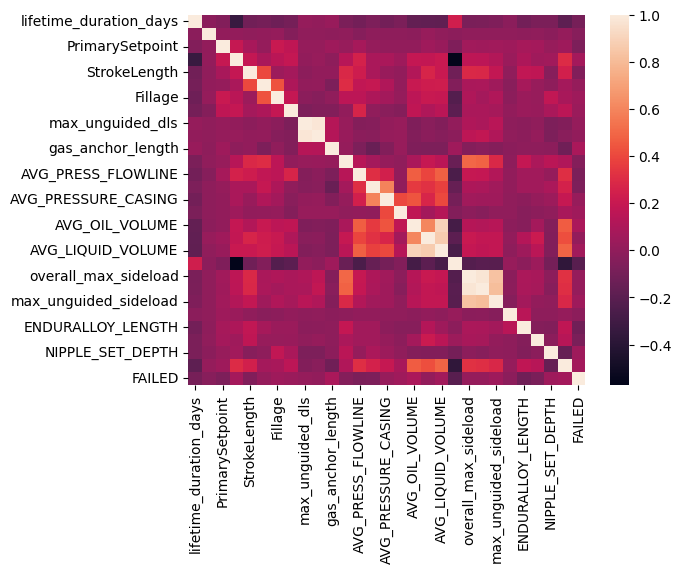

In [ ]:
#correlation heatmap (doesnt have labels for all features)
sns.heatmap(df_num.corr())
#r^2
(df_num.corr()**2).round(4)

In [ ]:
#fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

In [ ]:
#testedit